# Importing libraries

In [73]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings(action = "ignore", category = FutureWarning)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
path='/content/drive/MyDrive/19-05-2023/Iris.csv'

In [34]:
iris= pd.read_csv(path)

PRELIMINARY DATA INSPECTION

In [35]:
iris.shape

(150, 6)

In [36]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [38]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [50]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [40]:
iris.drop('Id', axis= 1, inplace= True)

In [41]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

VISUALIZING EACH INDEPENDENT VARIABLE WRT TO SPECIES(DEPENDENT VARIABLE) ONE BY ONE USING BOX PLOT

<Axes: xlabel='SepalLengthCm', ylabel='Species'>

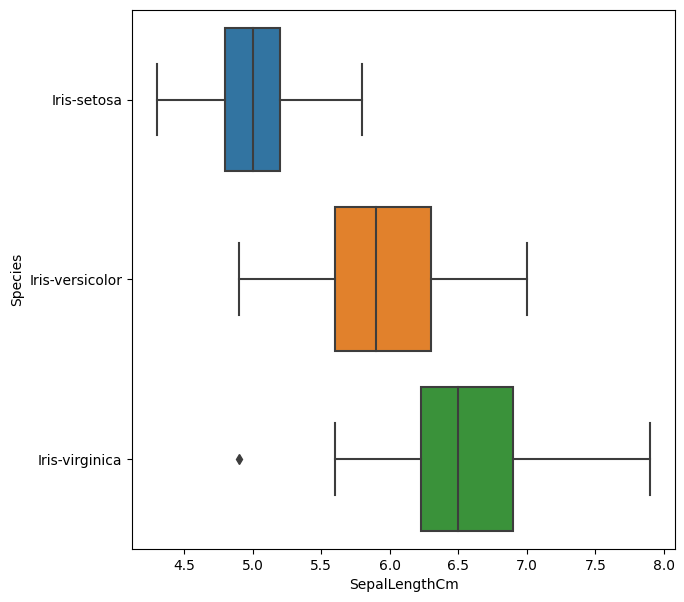

In [44]:
plt.figure(figsize=(7,7))
sns.boxplot(x="SepalLengthCm" , y="Species", data=iris)

<Axes: xlabel='SepalWidthCm', ylabel='Species'>

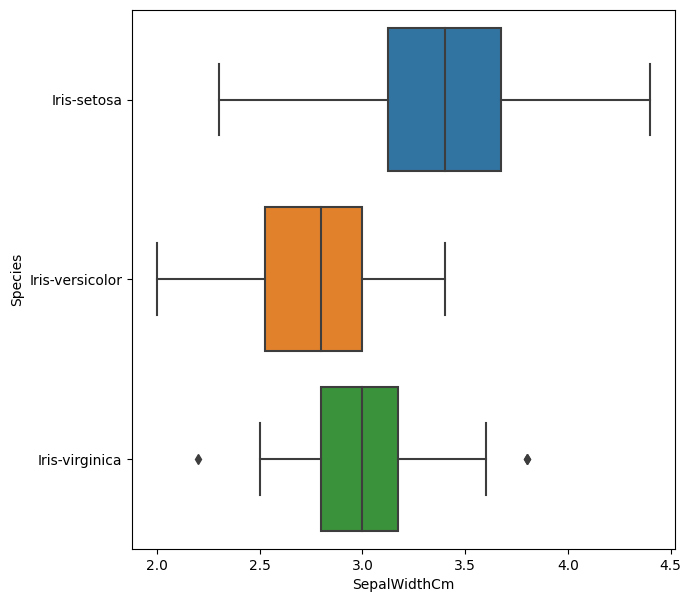

In [45]:
plt.figure(figsize=(7,7))
sns.boxplot(x="SepalWidthCm" , y="Species", data=iris)

<Axes: xlabel='PetalLengthCm', ylabel='Species'>

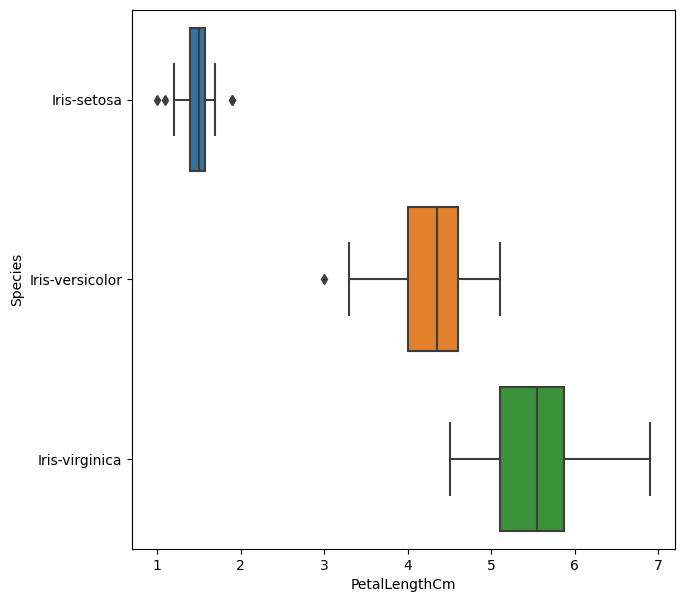

In [46]:
plt.figure(figsize=(7,7))
sns.boxplot(x="PetalLengthCm" , y="Species", data=iris)

<Axes: xlabel='PetalWidthCm', ylabel='Species'>

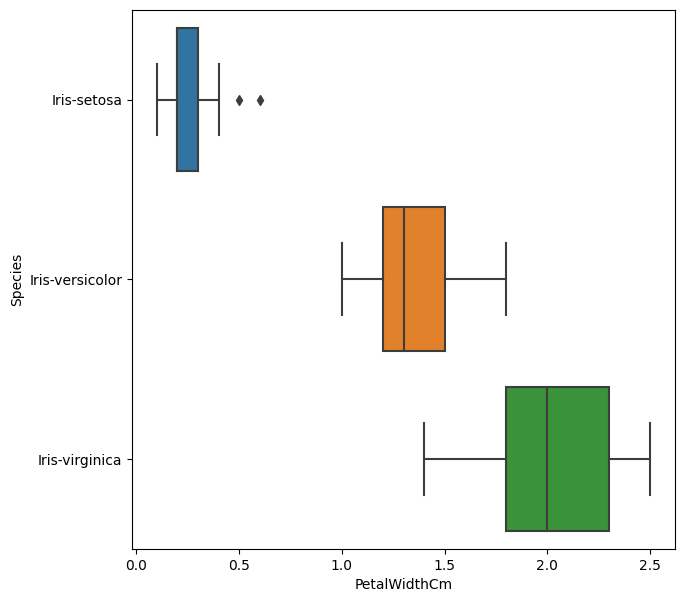

In [47]:
plt.figure(figsize=(7,7))
sns.boxplot(x="PetalWidthCm" , y="Species", data=iris)

we can see that the petal width and petal length of iris sentosa is visibly samller than sepal width and sepal length.

VISUALIZING THE WHOLE DATASET USING PAIRPLOT

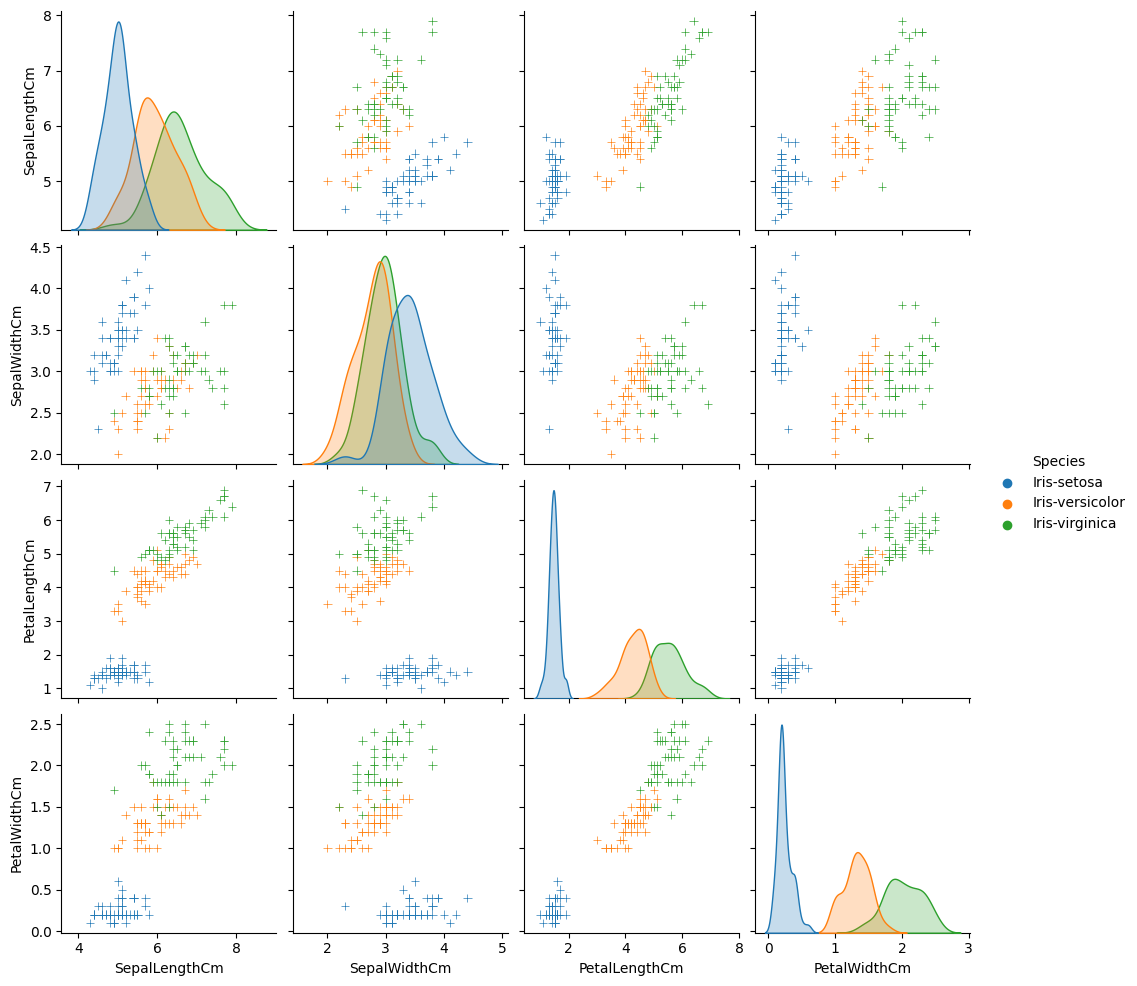

In [48]:
sns.pairplot(iris, hue='Species', markers='+')
plt.show()

Model Preparation

In [57]:
X = iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = iris['Species']
#Importing "train_test-split" function to test the model
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
lr= LogisticRegression()

In [60]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
39,5.1,3.4,1.5,0.2
118,7.7,2.6,6.9,2.3
138,6.0,3.0,4.8,1.8
75,6.6,3.0,4.4,1.4
37,4.9,3.1,1.5,0.1


In [61]:
print("Train dataset shape is", X_train.shape)
print("Test dataset shape is", X_test.shape)

Train dataset shape is (105, 4)
Test dataset shape is (45, 4)


In [62]:
lr.fit(X_train,y_train).score(X_train,y_train)

0.9809523809523809

In [63]:
prediction=lr.predict(X_test)

In [64]:
print (X_test.head())

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
38             4.4           3.0            1.3           0.2
66             5.6           3.0            4.5           1.5
115            6.4           3.2            5.3           2.3
117            7.7           3.8            6.7           2.2
89             5.5           2.5            4.0           1.3


In [65]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, prediction) 
print(cm)
accuracy = metrics.accuracy_score(y_test, prediction) 
print("Accuracy score:",accuracy)

[[16  0  0]
 [ 0 14  0]
 [ 0  0 15]]
Accuracy score: 1.0


In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [67]:
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [68]:
from sklearn.svm import SVC

In [69]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
iris['Species']=encoder.fit_transform(iris['Species'])

In [70]:
model=SVC()
model.fit(X_train, y_train)

SVC()

In [71]:
y_pred =model.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

In [72]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, y_pred)
print("Accuracy for the SVM Classifier: {:.3f}".format(accuracy))

Accuracy for the SVM Classifier: 1.000


**So the SVM gives 95.6% accuracy
RANDOM FOREST IS PERFORMING BETTER THAN OTHER TWO.**